In [49]:
import torch
import matplotlib.pyplot as plt

## Perceptron

```pseudo
1. Inicialize os pesos e bias para 0 ou numeros aleatórios pequenos
2. FOR x_i IN X:
3.  | compute a saida de y_i
4.  | atualize os pesos e bias
```

In [76]:
class Perceptron:
    '''Perceptron Classifier

    Parameters
    ----------
    eta : float
        taxa de aprendizado (default: 0.01)
    
    max_iter : int
        número máximo de iterações (default: 1000)
    
    random_state : int
        semente para geração de números aleatórios (default: None)
    
    Attributes
    ----------
    weights_ : array-like, shape (n_features,)
        pesos do modelo após o treinamento
    bias_ : float
        bias do modelo após o treinamento
    '''
    def __init__(self, eta=0.01, max_iter=1000, random_state=1):
        self.eta = eta
        self.max_iter = max_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        '''Treina o modelo Perceptron

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            dados de entrada
        
        y : array-like, shape (n_samples,)
            rótulos de classe
        '''
        

        # definindo a semente para reprodutibilidade
        torch.manual_seed(self.random_state)

        # inicializando pesos e bias
        self.weights_ = torch.normal(0, 0.1, (X.shape[1], 1))
        
        self.bias_    = torch.zeros(1)

        self.errors_  = []


        for _ in range(self.max_iter):
            errors = 0 

            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))

                # atualizando pesos e bias
                self.weights_ += update * xi.view(-1, 1)
                self.bias_    += update

                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        '''Calcula a entrada líquida do modelo

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            dados de entrada
        
        Returns
        -------
        net_input : array-like, shape (n_samples,)
            entrada líquida do modelo
        '''
        return torch.matmul(X, self.weights_) + self.bias_
    
    def predict(self, X):
        '''Faz previsões com o modelo Perceptron

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            dados de entrada
        
        Returns
        -------
        predictions : array-like, shape (n_samples,)
            previsões do modelo
        '''
        return torch.where(self.net_input(X) >= 0.0, 1, -1).squeeze()

### Usando dados de iris

In [77]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data 
y = data.target

In [78]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [79]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [80]:
X = torch.tensor(X, dtype=torch.float32)

y = torch.tensor(y, dtype=torch.float32)

Convetendo para uma classifição binaria

In [81]:
y = torch.where(y == 0, 0, 1)
y

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1])

## Plotando

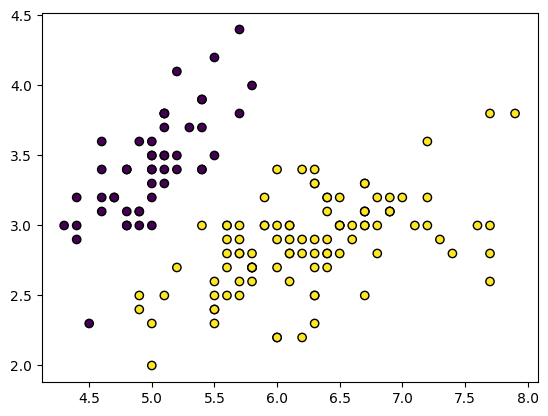

In [82]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')

## Treinando o modelo

In [93]:
ppn = Perceptron(eta=0.1, max_iter=10, random_state=1)
X = X[:, :2]  # Usando apenas as duas primeiras características para visualização
ppn.fit(X, y)

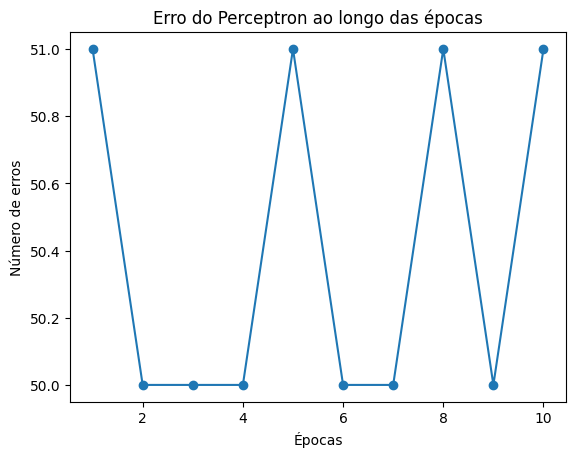

In [94]:
plt.plot(torch.arange(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Número de erros')
plt.title('Erro do Perceptron ao longo das épocas')
plt.show()

## Adaline